# Context


#### *What is India VIX*?
* The Volatility Index measures the market's anticipation of volatility in the near term. 
- During moments of market volatility, the market typically moves sharply up or down, and the VIX tends to climb.

- VIX falls as volatility falls. It is not the same as a price index like the NIFTY. 
- The price index is calculated by taking the price movement of the underlying equities into account.


#### *Scope of analysis*?
We will focusing on movment Nifty impacted by IndiaVix rather than focusing on how it is being impacted by option price.

As we are concerned with view of a quarter

# What questions are we trying to answer?




- Understand relationship between Nifty price behaviour with volatilty index?

- Probablity of volatilty in nifty when Vix is at a particular point? Looking at historical data?

- Impact of RBI interest rate? 

- Impact of RBI interest rate changed by particular points in a direction?


---
---
---
---

---
---
---
---

####  Pre-requiset Libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Sourcing Data

>Imported data from "investing.com" for educational purposes

#### Making copies of data for data safety

In [2]:
data1 = pd.read_csv(r'C:\Users\ALIE-n-WARE\Desktop\IndiaVIXanalysis\Data\India VIX Historical Data.csv')
df1 = data1.copy()
df1.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,08/27/2024,13.695,12.7100,14.0100,12.71,0.00K,-0.72%
1,08/26/2024,13.795,13.5525,13.9925,12.01,NaN,1.79%


In [3]:
data2 = pd.read_csv(r'C:\Users\ALIE-n-WARE\Desktop\IndiaVIXanalysis\Data\Nifty 50 Historical Data.csv')
df2 = data2.copy()
df2.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2008,"6,144.35","6,136.75","6,165.35","6,109.85",81.31B,0.09%
1,01/02/2008,"6,179.40","6,144.70","6,197.00","6,060.85",110.35B,0.57%


---

# Data PreProcessing

#### Correcting date format

In [4]:
# Convert 'date' columns to datetime if they are not already
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])


#### Joining data

In [5]:
# Merge DataFrames on 'date'
niftyvix = pd.merge(df1, df2, on='Date', how='inner')

#### Renaming Column for readablity

In [6]:
niftyvix.head(1)

,Date,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Price_y,Open_y,High_y,Low_y,Vol._y,Change %_y
0,2024-08-27,13.695,12.71,14.01,12.71,0.00K,-0.72%,"25,017.75","25,032.10","25,072.55","24,974.55",223.35K,0.03%


In [7]:
niftyvix = niftyvix.rename(columns={'Price_x': 'vclose', 'Open_x': 'vopen', 'High_x': 'vhigh','Low_x': 'vlow', 'Change %_x': 'vchange', 'Price_y': 'nclose', 'Open_y': 'nopen', 'High_y': 'nhigh', 'Low_y': 'nlow', 'Change %_y': 'nchange'})

In [8]:
niftyvix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4076 non-null   datetime64[ns]
 1   vclose   4076 non-null   float64       
 2   vopen    4076 non-null   float64       
 3   vhigh    4076 non-null   float64       
 4   vlow     4076 non-null   float64       
 5   Vol._x   2 non-null      object        
 6   vchange  4076 non-null   object        
 7   nclose   4076 non-null   object        
 8   nopen    4076 non-null   object        
 9   nhigh    4076 non-null   object        
 10  nlow     4076 non-null   object        
 11  Vol._y   4072 non-null   object        
 12  nchange  4076 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 414.1+ KB


#### Values in **nchange** columns are **string**, we will change them to **float** 

In [9]:
niftyvix['nchange'].describe()

count       4076
unique       640
top       -0.10%
freq          31
Name: nchange, dtype: object

In [10]:
niftyvix['nchange'] = niftyvix['nchange'].str.rstrip('%').astype(float)
niftyvix['nchange'].describe()

count    4076.000000
mean        0.047866
std         1.287635
min       -12.980000
25%        -0.520000
50%         0.070000
75%         0.660000
max        17.740000
Name: nchange, dtype: float64

#### Values in **vchange** columns are **string**, we will change them to **float**

In [11]:
niftyvix['vchange'].describe()

count      4076
unique     1723
top       0.00%
freq         26
Name: vchange, dtype: object

In [12]:
niftyvix['vchange'] = niftyvix['vchange'].str.rstrip('%').astype(float)
niftyvix['vchange'].describe()

count    4076.000000
mean        0.151452
std         6.027993
min       -37.510000
25%        -2.800000
50%        -0.240000
75%         2.600000
max        64.360000
Name: vchange, dtype: float64

#### Values in **nclose,nopen,nhigh** columns are **string**  and also have **","** between numerals, we will remove "," and  change them to **float**

In [13]:
niftyvix['nclose'] = niftyvix['nclose'].str.replace(',', '').astype(float)
niftyvix['nopen'] = niftyvix['nopen'].str.replace(',', '').astype(float)
niftyvix['nhigh'] = niftyvix['nhigh'].str.replace(',', '').astype(float)
niftyvix['nlow'] = niftyvix['nlow'].str.replace(',', '').astype(float)

niftyvix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4076 non-null   datetime64[ns]
 1   vclose   4076 non-null   float64       
 2   vopen    4076 non-null   float64       
 3   vhigh    4076 non-null   float64       
 4   vlow     4076 non-null   float64       
 5   Vol._x   2 non-null      object        
 6   vchange  4076 non-null   float64       
 7   nclose   4076 non-null   float64       
 8   nopen    4076 non-null   float64       
 9   nhigh    4076 non-null   float64       
 10  nlow     4076 non-null   float64       
 11  Vol._y   4072 non-null   object        
 12  nchange  4076 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 414.1+ KB


In [14]:
niftyvix

,Date,vclose,vopen,vhigh,vlow,Vol._x,vchange,nclose,nopen,nhigh,nlow,Vol._y,nchange
0,2024-08-27,13.6950,12.7100,14.0100,12.7100,0.00K,-0.72,25017.75,25032.10,25072.55,24974.55,223.35K,0.03
1,2024-08-26,13.7950,13.5525,13.9925,12.0100,NaN,1.79,25010.60,24906.10,25043.80,24874.70,210.27M,0.76
2,2024-08-23,13.5525,13.0000,13.6200,10.8400,NaN,4.25,24823.15,24845.40,24858.40,24771.65,206.80M,0.05
3,2024-08-22,13.0000,13.3325,13.7825,10.9575,NaN,-2.49,24811.50,24863.40,24867.35,24784.45,220.35M,0.17
4,2024-08-21,13.3325,13.8200,14.0450,11.8225,NaN,-3.53,24770.20,24680.55,24787.95,24654.50,257.11M,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,2008-03-11,32.6900,30.7200,37.5400,29.7500,NaN,0.34,4865.90,4796.30,4888.50,4732.85,158.76B,1.36
4072,2008-03-10,32.5800,25.3300,47.9500,25.3300,NaN,-7.44,4800.40,4767.80,4814.95,4620.50,155.88B,0.60
4073,2008-03-07,35.2000,36.9500,39.3400,27.0500,NaN,-0.87,4771.60,4918.30,4918.30,4672.25,145.78B,-3.04
4074,2008-03-05,35.5100,38.0800,38.7600,27.9500,NaN,-6.75,4921.40,4866.85,4936.75,4847.25,114.72B,1.17


#### we are droping  daily open, high and low data as well as we will be focusing close only

In [15]:
niftyvix=niftyvix.drop(['vopen','vhigh','vlow','nopen','nhigh','nlow'],axis=1)

#### Droping Vol._x which is vix volume because there are is not enough data in the column

In [16]:
niftyvix['Vol._x'].isna().count()

4076

In [17]:
niftyvix=niftyvix.drop('Vol._x',axis=1)

In [18]:
niftyvix.head(1)

,Date,vclose,vchange,nclose,Vol._y,nchange
0,2024-08-27,13.695,-0.72,25017.75,223.35K,0.03


#### change Vol._y string values to float and correcting it for the values implied by M and K in the values and also removin the commas

> **UNDERSTANDING** : when making such changes to a column we right code from the perpective of making change to a single value, and that the iteration will take care of itself.

In [19]:
def convert_value(value):
    if isinstance(value, str):  # Ensure the value is a string
        # Remove commas for proper float conversion
        value = value.replace(',', '')
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        elif value.endswith('M'):
            return float(value[:-1]) * 1000000
        elif value.endswith('B'):
            return float(value[:-1]) * 1000000000
        else:
            return float(value)  # No suffix, just convert to float
    elif isinstance(value, (int, float)):  # Handle numeric values directly
        return float(value)
    else:
        raise ValueError(f"Unsupported value type: {type(value)}")


In [20]:
niftyvix['Vol._y'] = niftyvix['Vol._y'].apply(convert_value)

####  renaming 'Vol._y': 'nvol'for better understanding

In [21]:
niftyvix = niftyvix.rename(columns={'Vol._y': 'nvol'})


In [22]:
niftyvix['nvol'].mean()

230091685619.6832

In [23]:
niftyvix.describe()

,Date,vclose,vchange,nclose,nvol,nchange
count,4076,4076.000000,4076.000000,4076.000000,4.072000e+03,4076.000000
mean,2016-06-02 07:27:36.918547456,20.401995,0.151452,9916.414328,2.300917e+11,0.047866
min,2008-03-04 00:00:00,10.135000,-37.510000,2524.200000,2.233500e+05,-12.980000
25%,2012-04-19 18:00:00,14.534375,-2.800000,5599.325000,1.305600e+11,-0.520000
50%,2016-06-02 12:00:00,17.630000,-0.240000,8481.125000,1.814000e+11,0.070000
75%,2020-07-20 06:00:00,22.751875,2.600000,11925.750000,2.831575e+11,0.660000
max,2024-08-27 00:00:00,85.130000,64.360000,25017.750000,1.810970e+12,17.740000
std,NaN,9.248742,6.027993,5214.681473,1.909322e+11,1.287635


turning dataframe upside down as it was not in the direction when Tried to print the graph

In [24]:
niftyvix = niftyvix.iloc[::-1].reset_index(drop=True)

Let's make **Date** as axis and print the charts against it


In [25]:
niftyvix.set_index('Date', inplace=True)

In [26]:
niftyvix.head()

,vclose,vchange,nclose,nvol,nchange
Date,,,,,
2008-03-04,38.08,6.49,4864.25,1.508400e+11,-1.79
2008-03-05,35.51,-6.75,4921.40,1.147200e+11,1.17
2008-03-07,35.20,-0.87,4771.60,1.457800e+11,-3.04
2008-03-10,32.58,-7.44,4800.40,1.558800e+11,0.60
2008-03-11,32.69,0.34,4865.90,1.587600e+11,1.36


Printing all data for better understanding

<Axes: xlabel='Date'>

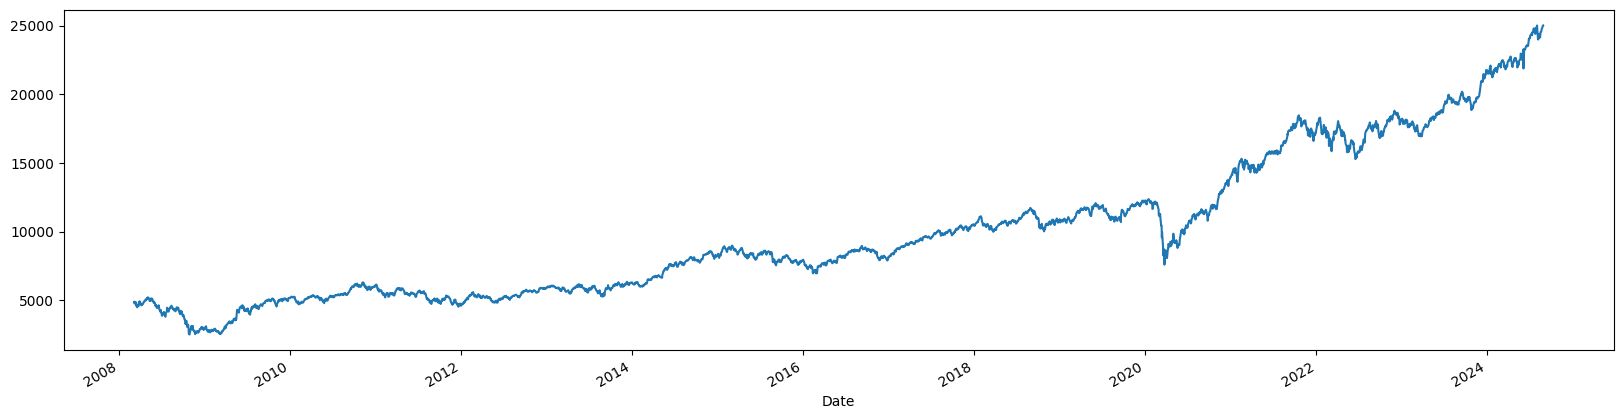

In [27]:
niftyvix['nclose'].plot(figsize=(20,5))

<Axes: xlabel='Date'>

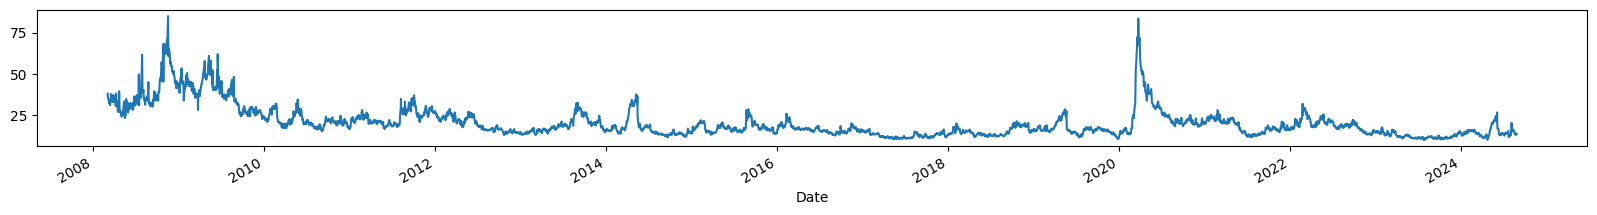

In [28]:
niftyvix['vclose'].plot(figsize=(20,2))

<Axes: xlabel='Date'>

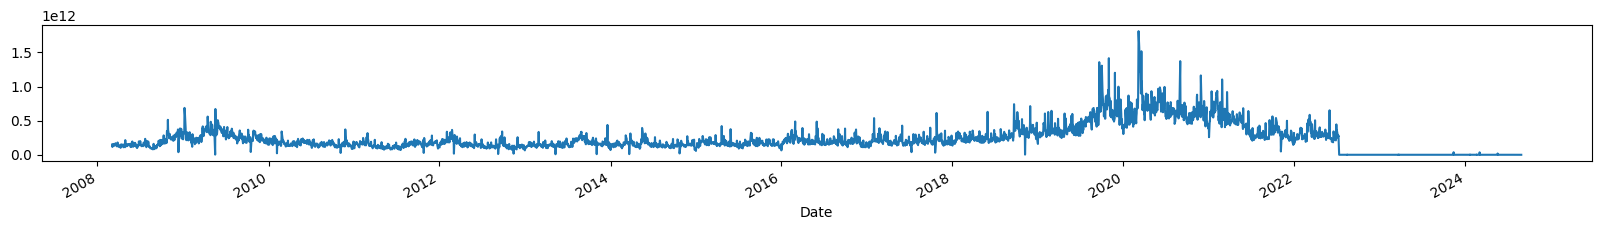

In [29]:
niftyvix['nvol'].plot(figsize=(20,2))

>We can observe looking at the chart that the volume data is flawed looking at the recent years so we will drop it from the dataframe.

In [30]:
niftyvix = niftyvix.drop("nvol", axis=1)
niftyvix.head(1)

,vclose,vchange,nclose,nchange
Date,,,,
2008-03-04,38.08,6.49,4864.25,-1.79


---
# Feature Engineering

## Creating columns to refer historical points, where the:
- nclose was:
    - 1 day
    - 5 days
    - 10 days
    - 20 days
    - 40 days
    - 60 days
    
- nchange was:
    - 1 day
    - 5 days
    - 10 days
    - 20 days
    - 40 days
    - 60 days

- vclose was:
    - 1 day
    - 5 days
    - 10 days
    - 20 days
    - 40 days
    - 60 days

- vchange was:
    - 1 day
    - 5 days
    - 10 days
    - 20 days
    - 40 days
    - 60 days

Adding columns of ***nclose***

In [31]:
niftyvix['n5day'] = niftyvix['nclose'].shift(5)
niftyvix['n10day'] = niftyvix['nclose'].shift(10)
niftyvix['n20day'] = niftyvix['nclose'].shift(20)
niftyvix['n1day'] = niftyvix['nclose'].shift(40)
niftyvix['n60day'] = niftyvix['nclose'].shift(60)

Adding columns of ***nchange***

In [32]:
niftyvix['nc5day'] = niftyvix['nchange'].shift(5)
niftyvix['nc10day'] = niftyvix['nchange'].shift(10)
niftyvix['nc20day'] = niftyvix['nchange'].shift(20)
niftyvix['nc1day'] = niftyvix['nchange'].shift(40)
niftyvix['nc60day'] = niftyvix['nchange'].shift(60)

Adding columns of ***vclose***

In [33]:
niftyvix['v5day'] = niftyvix['vclose'].shift(5)
niftyvix['v10day'] = niftyvix['vclose'].shift(10)
niftyvix['v20day'] = niftyvix['vclose'].shift(20)
niftyvix['v1day'] = niftyvix['vclose'].shift(40)
niftyvix['v60day'] = niftyvix['vclose'].shift(60)

Adding columns of ***vchange***

In [34]:
niftyvix['vc5day'] = niftyvix['vchange'].shift(5)
niftyvix['vc10day'] = niftyvix['vchange'].shift(10)
niftyvix['vc20day'] = niftyvix['vchange'].shift(20)
niftyvix['vc1day'] = niftyvix['vchange'].shift(40)
niftyvix['vc60day'] = niftyvix['vchange'].shift(60)

In [35]:
niftyvix[['nclose','vclose']].corr()

,nclose,vclose
nclose,1.00000,-0.45539
vclose,-0.45539,1.00000


In [36]:
niftyvix.tail(10)

,vclose,vchange,nclose,nchange,n5day,n10day,n20day,n1day,n60day,nc5day,...,v5day,v10day,v20day,v1day,v60day,vc5day,vc10day,vc20day,vc1day,vc60day
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-13,16.1675,1.89,24139.00,-0.85,23992.55,24857.30,24586.70,23465.60,22466.10,-0.26,...,18.7425,12.8800,14.1875,12.8225,19.7975,-7.98,-0.50,3.37,-4.93,-0.99
2024-08-14,15.4350,-4.53,24143.75,0.02,24297.50,24951.15,24613.00,23557.90,22502.00,1.27,...,16.1700,13.2500,14.2225,12.9650,20.5250,-13.73,2.87,0.25,1.11,3.67
2024-08-16,14.4025,-6.69,24541.15,1.65,24117.00,25010.90,24800.85,23516.00,22529.05,-0.74,...,16.6025,12.9300,14.5100,13.7125,21.8100,2.67,-2.42,2.02,5.77,6.26
2024-08-19,14.3150,-0.61,24572.65,0.13,24367.50,24717.70,24530.90,23567.00,22597.80,1.04,...,15.3350,14.3200,14.8250,13.3450,21.4675,-7.63,10.75,2.17,-2.68,-1.57
2024-08-20,13.8200,-3.46,24698.85,0.51,24347.00,24055.60,24509.25,23501.10,22967.65,-0.08,...,15.8675,20.3675,15.4375,13.1800,21.3800,3.47,42.23,4.13,-1.24,-0.41
2024-08-21,13.3325,-3.53,24770.20,0.29,24139.00,23992.55,24479.05,23537.85,22957.10,-0.85,...,16.1675,18.7425,12.7475,14.0575,21.7100,1.89,-7.98,-17.43,6.66,1.54
2024-08-22,13.0000,-2.49,24811.50,0.17,24143.75,24297.50,24413.50,23721.30,22932.45,0.02,...,15.4350,16.1700,11.7625,14.3125,23.1925,-4.53,-13.73,-7.73,1.81,6.83
2024-08-23,13.5525,4.25,24823.15,0.05,24541.15,24117.00,24406.10,23868.80,22888.15,1.65,...,14.4025,16.6025,12.6175,14.0450,24.1950,-6.69,2.67,7.27,-1.87,4.32
2024-08-26,13.7950,1.79,25010.60,0.76,24572.65,24367.50,24834.85,24044.50,22704.70,0.13,...,14.3150,15.3350,12.2475,14.1525,24.1750,-0.61,-7.63,-2.93,0.77,-0.08


## Nominal columns by day name and month name

In [37]:
niftyvix['DayOfWeek'] = niftyvix.index.day_name()
niftyvix['month'] = niftyvix.index.month_name()
niftyvix.head(62)

,vclose,vchange,nclose,nchange,n5day,n10day,n20day,n1day,n60day,nc5day,...,v20day,v1day,v60day,vc5day,vc10day,vc20day,vc1day,vc60day,DayOfWeek,month
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-04,38.08,6.49,4864.25,-1.79,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,March
2008-03-05,35.51,-6.75,4921.40,1.17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,March
2008-03-07,35.20,-0.87,4771.60,-3.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,March
2008-03-10,32.58,-7.44,4800.40,0.60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,March
2008-03-11,32.69,0.34,4865.90,1.36,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-06-02,29.49,10.53,4739.60,-2.68,4875.05,5157.70,5228.20,4739.55,NaN,-1.45,...,24.21,35.10,NaN,-3.00,-19.88,-7.45,-0.11,NaN,Monday,June
2008-06-03,28.49,-3.39,4715.90,-0.50,4859.80,5104.95,5192.25,4754.20,NaN,-0.31,...,25.07,33.62,NaN,-13.39,7.48,3.55,-4.22,NaN,Tuesday,June
2008-06-04,29.82,4.67,4585.60,-2.76,4918.35,5117.65,5144.65,4771.60,NaN,1.20,...,24.91,36.68,NaN,14.13,11.48,-0.64,9.10,NaN,Wednesday,June


## Correlation between all available columns

For days

In [38]:
days_of_week = niftyvix['DayOfWeek'].unique()
for day in days_of_week:
    niftyvix[day] = (niftyvix.index.day_name() == day).astype(int)

For Months

In [39]:
months_of_year = niftyvix['month'].unique()

# Create columns for each unique month with 1 if the date corresponds to that month, otherwise 0
for month in months_of_year:
    niftyvix[month] = (niftyvix['month'] == month).astype(int)

In [40]:
niftyvix.head()

,vclose,vchange,nclose,nchange,n5day,n10day,n20day,n1day,n60day,nc5day,...,May,June,July,August,September,October,November,December,January,February
Date,,,,,,,,,,,,,,,,,,,,,
2008-03-04,38.08,6.49,4864.25,-1.79,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2008-03-05,35.51,-6.75,4921.40,1.17,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2008-03-07,35.20,-0.87,4771.60,-3.04,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2008-03-10,32.58,-7.44,4800.40,0.60,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2008-03-11,32.69,0.34,4865.90,1.36,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


## Correlation between Nifty price and vix

#### All time data

In [41]:
niftyvix[['nclose','vclose']].corr()

,nclose,vclose
nclose,1.00000,-0.45539
vclose,-0.45539,1.00000


#### Three year data

In [42]:
niftyvix[['nclose','vclose']].tail(720).corr()

,nclose,vclose
nclose,1.000000,-0.425074
vclose,-0.425074,1.000000


#### One year data

In [43]:
niftyvix[['nclose','vclose']].tail(240).corr()

,nclose,vclose
nclose,1.000000,0.390487
vclose,0.390487,1.000000


#### Past 60 days

In [44]:
niftyvix[['nclose','vclose']].tail(60).corr()

,nclose,vclose
nclose,1.000000,-0.647554
vclose,-0.647554,1.000000


#### Past 20 days

In [45]:
niftyvix[['nclose','vclose']].tail(20).corr()

,nclose,vclose
nclose,1.000000,-0.874464
vclose,-0.874464,1.000000


> by above analysis we can say that nifty and IndiaVix have a negetive correlation between them